In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D 
import os

data = os.getcwd() + '/data'

In [2]:
def data_extractor(N, g_or_h, M, datasets, datas_per_datasets, start, crit_exp1=0, crit_exp2=0, start_point=0, g_offset=0):
    M_r = []  # Magnetization
    G_r = []  # Effective temperatures or magnetic field (depending on what is passed in g_or_h)

    for i in range(start_point,datasets*datas_per_datasets,datas_per_datasets):  # Data extraction from file format
        index = i/datas_per_datasets + start
        M_temp = M[i:i+datas_per_datasets]*index**(crit_exp1)
        G_temp = (g_or_h[i:i+datas_per_datasets]-g_offset)*index**(crit_exp2)
        G_r.append(G_temp[M_temp!=-10])  # Errors handling (sometimes eigs_sym fail)
        M_r.append(M_temp[M_temp!=-10])  # Errors handling (sometimes eigs_sym fail)
    return M_r, G_r

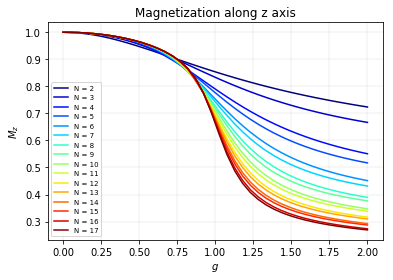

In [3]:
# Analysis h = 0

N, g, M = np.loadtxt(data + '/(h=0)_2_17.txt', unpack=True)  # Data extraction

M_r, G_r = data_extractor(N, g, M, 16, 40, 2)

fig, ax = plt.subplots()  # Plotting data
ax.set_title('Magnetization along z axis')
ax.set_xlabel('$g$')
ax.set_ylabel('$M_z$')

n = len(M_r)
colors = cm.jet(np.linspace(0,1,n))

for index,mz in enumerate(M_r):
    ax.plot(G_r[index], mz, color=colors[index],label='N = ' + str(index+2)) 
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.legend(fontsize=7)
plt.show()

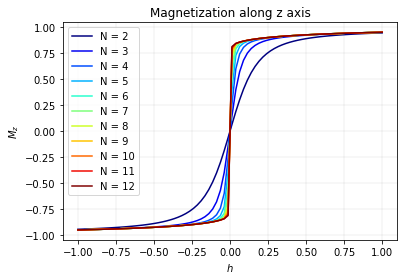

In [4]:
# Analysis g = 0.9

N, h, M = np.loadtxt(data + '/(g=0.9)_2_12.txt',unpack=True)

M_r, H_r = data_extractor(N, h, M, 11, 80, 2)

fig, ax= plt.subplots()

ax.set_title('Magnetization along z axis')
ax.set_xlabel('$h$')
ax.set_ylabel('$M_z$')


n = len(M_r)

colors = cm.jet(np.linspace(0,1,n))

for index,mz in enumerate(M_r):
    ax.plot(H_r[index], mz, color=colors[index], label='N = '+ str(index+2)) 
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.legend()
plt.show()

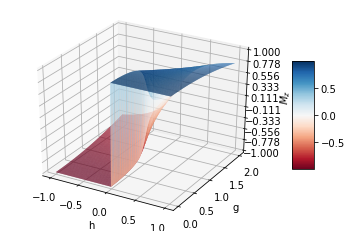

In [5]:
# All data analysis

h, g, m = np.loadtxt(data + '/g_h_12.txt',unpack=True)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_trisurf(h, g, m, cmap=cm.RdBu, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('h')
ax.set_ylabel('g')
ax.set_zlabel('$M_z$')
ax.set_zlim(-1, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
plt.show()

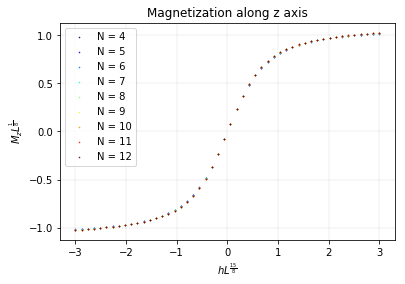

In [6]:
# Finite size scaling magnetization g = 1

N, h, M = np.loadtxt(data + '/g=1_finite_size.txt',unpack=True)

M_r, H_r = data_extractor(N, h, M, 9, 50, 4, 1/8., 15./8.)

fig, ax= plt.subplots()

ax.set_title('Magnetization along z axis')
ax.set_xlabel('$hL^\\frac{15}{8}$')
ax.set_ylabel('$M_z L^\\frac{1}{8}$')

n = len(M_r)

colors = cm.jet(np.linspace(0,1,n))

for index,mz in enumerate(M_r):
    ax.scatter(H_r[index],mz,s=0.3, color=colors[index],label='N = '+ str(index+4)) #ACHTUNG h-1 from data
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.legend()
plt.show()

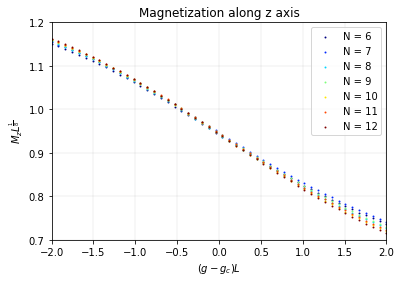

In [7]:
# Finite size scaling magnetization h = 0

N,g,M= np.loadtxt(data +'/h=0_finite_size.txt',unpack=True)

M_r, G_r = data_extractor(N, g, M, 9, 50, 4, 1/8., 1., 100, 1)

fig, ax= plt.subplots()

ax.set_title('Magnetization along z axis')
ax.set_xlabel('$(g-g_c)L$')
ax.set_ylabel('$M_z L^\\frac{1}{8}$')


n = len(M_r)

colors = cm.jet(np.linspace(0,1,n))

for index,mz in enumerate(M_r):
    ax.scatter(G_r[index], mz, s=0.9, color=colors[index], label='N = '+ str(index+6)) 
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_xlim(-2, 2)
ax.set_ylim(0.7, 1.2)
ax.legend()
plt.show()

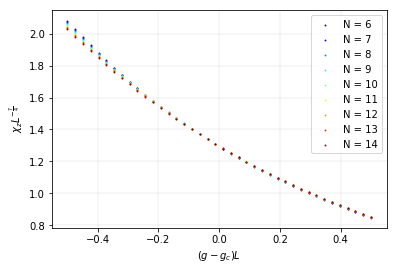

In [8]:
# Finite size on magnetic susceptibility

N, h, Chi = np.loadtxt(data + '/chi.txt',unpack=True)

Chi_r, H_r = data_extractor(N, h, Chi, 13, 40, 2, -7./4., 1., 160, 1)

fig, ax = plt.subplots()

ax.set_xlabel('$(g-g_c)L$')
ax.set_ylabel('$\\chi_z L^{-\\frac{7}{4}}$')

n = len(Chi_r)

colors = cm.jet(np.linspace(0,1,n))

for index,chi in enumerate(Chi_r):
    ax.scatter(H_r[index], chi, s=0.7, color=colors[index] ,label='N = '+ str(index+6)) 
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

ax.legend()
plt.show()

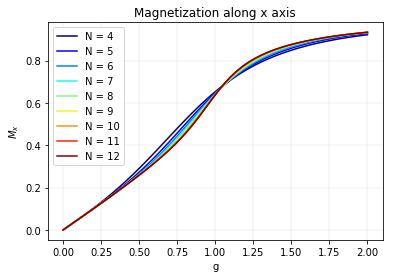

In [9]:
# Analysis of longitudinal magnetization

N, g, M= np.loadtxt(data +'/mx.txt',unpack=True)

M_r, H_r = data_extractor(N, g, M, 11, 50, 2, 0., 0., 100)

fig, ax= plt.subplots()

ax.set_title('Magnetization along x axis')
ax.set_xlabel('g')
ax.set_ylabel('$M_x$')


n = len(M_r)

colors = cm.jet(np.linspace(0,1,n))

for index,mx in enumerate(M_r):

    ax.plot(H_r[index], -mx, color=colors[index],label='N = '+ str(index+4)) 
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

ax.legend()
plt.show()
